In [2]:
import math
import random
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
class User:
    def __init__(self, age, p, q):
        self.v = age
        self.D = [i for i in range(1,101)]
        self.d = 100
        self.p = p
        self.q = q
        
    def toss_a_coin(self): # to your witcher, oh valley of plenty
        probabilities = [self.p, 1 - self.p]
        
        # 0 heads, 1 tails
        return random.choices([0,1], weights = probabilities, k = 1)[0]
    
    def report(self):
        result = self.toss_a_coin()
        
        if result == 0:
            return self.v
        else:
            d_minus = list(filter(lambda x: x != self.v, self.D))
            return random.choice(d_minus)

In [39]:
class GDR:
    def __init__(self, epsilon=4):
        self.d = 100
        self.epsilon = epsilon
        self.p = math.exp(epsilon) / (math.exp(epsilon) + self.d - 1)
        self.q = (1 - self.p) / (self.d - 1)
        self.users = self.get_users()
        self.aggregation = self.aggregate() # keys are ages, values are ivs
        
    def get_users(self):
        users = []

        with open("ages.txt") as age_file:
            for age in age_file:
                users.append(User(int(age.replace('\n','')), self.p, self.q))
                
        return users
        
    def get_reported_values(self):
        ages = [user.report() for user in self.users]
        return ages
    
    def aggregate(self):
        counter = Counter(self.get_reported_values())
        print(counter)
        return counter
        
    def estimate(self, age):
        I_v = self.aggregation[age]
        estimation = (I_v - len(self.users) * self.q) / (self.p - self.q)
        print(f'Age: {age}, IV: {I_v}, p: {self.p}, q: {self.q}, Estimation: {estimation}')
        print((I_v - len(self.users) * self.q))
        
        return estimation
    
    def get_estimates(self):
        estimates = []
        
        for age in self.aggregation.keys():
            estimates.append(self.estimate(age))
            
        return estimates
    
    def plot_hist(self):
        estimates = self.get_estimates()
        recovered_aggregation = Counter(estimates)
        plt.figure(figsize=(20, 3))
        plt.xlabel("Ages", labelpad=16, fontsize=16)
        plt.ylabel("Number of people", labelpad=16, fontsize=16)
        #print(recovered_aggregation.keys())
        #print(recovered_aggregation.values())
        plt.bar(recovered_aggregation.keys(), recovered_aggregation.values())
        plt.show()

Counter({38: 2093, 41: 2064, 42: 2054, 37: 2042, 39: 2041, 40: 1979, 43: 1943, 36: 1935, 44: 1921, 35: 1906, 45: 1887, 34: 1816, 46: 1815, 33: 1774, 47: 1711, 32: 1691, 48: 1581, 31: 1570, 30: 1567, 49: 1543, 50: 1437, 29: 1430, 51: 1376, 28: 1346, 27: 1298, 52: 1251, 53: 1214, 26: 1152, 25: 1113, 24: 1105, 54: 1098, 56: 1046, 55: 1039, 23: 1018, 22: 998, 57: 965, 21: 926, 58: 903, 59: 876, 19: 861, 20: 840, 60: 838, 61: 779, 18: 771, 17: 756, 65: 752, 14: 735, 87: 732, 64: 728, 62: 725, 16: 717, 63: 716, 12: 706, 15: 701, 98: 701, 6: 697, 72: 695, 99: 692, 70: 689, 69: 687, 3: 686, 90: 680, 10: 680, 78: 679, 88: 675, 85: 671, 9: 670, 82: 669, 11: 669, 13: 668, 4: 666, 5: 666, 93: 664, 71: 663, 80: 663, 66: 663, 79: 662, 68: 659, 8: 657, 96: 653, 74: 653, 91: 653, 92: 653, 77: 650, 1: 646, 84: 644, 7: 641, 67: 638, 2: 637, 97: 636, 81: 628, 86: 623, 76: 623, 75: 621, 73: 617, 83: 611, 94: 610, 89: 605, 100: 604, 95: 602})
Age: 43, IV: 1943, p: 0.35546098713664687, q: 0.0065104950794278

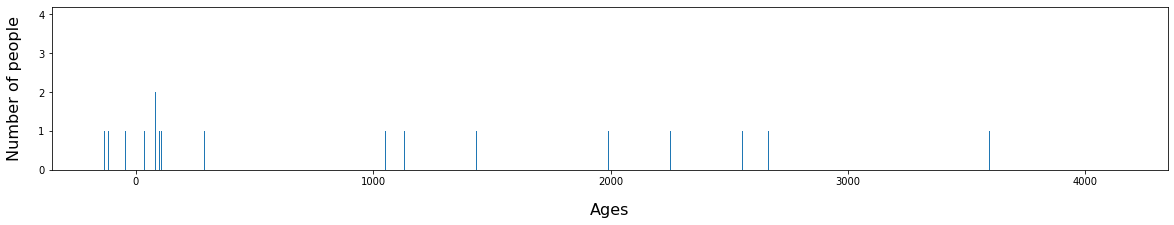

In [40]:
gdr = GDR()
gdr.plot_hist()